# LAB | Imbalanced

**Load the data**

In this challenge, we will be working with Credit Card Fraud dataset.

https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv

Metadata

- **distance_from_home:** the distance from home where the transaction happened.
- **distance_from_last_transaction:** the distance from last transaction happened.
- **ratio_to_median_purchase_price:** Ratio of purchased price transaction to median purchase price.
- **repeat_retailer:** Is the transaction happened from same retailer.
- **used_chip:** Is the transaction through chip (credit card).
- **used_pin_number:** Is the transaction happened by using PIN number.
- **online_order:** Is the transaction an online order.
- **fraud:** Is the transaction fraudulent. **0=legit** -  **1=fraud**


In [28]:
#Libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import precision_score, recall_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import StandardScaler

from sklearn.utils import resample

In [29]:
fraud = pd.read_csv("https://raw.githubusercontent.com/data-bootcamp-v4/data/main/card_transdata.csv")
fraud.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


**Steps:**

- **1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?
- **2.** Train a LogisticRegression.
- **3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.
- **4.** Run **Oversample** in order to balance our target variable and repeat the steps above, now with balanced data. Does it improve the performance of our model? 
- **5.** Now, run **Undersample** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model?
- **6.** Finally, run **SMOTE** in order to balance our target variable and repeat the steps above (1-3), now with balanced data. Does it improve the performance of our model? 

In [30]:
fraud.isnull().sum()

distance_from_home                0
distance_from_last_transaction    0
ratio_to_median_purchase_price    0
repeat_retailer                   0
used_chip                         0
used_pin_number                   0
online_order                      0
fraud                             0
dtype: int64

**1.** What is the distribution of our target variable? Can we say we're dealing with an imbalanced dataset?

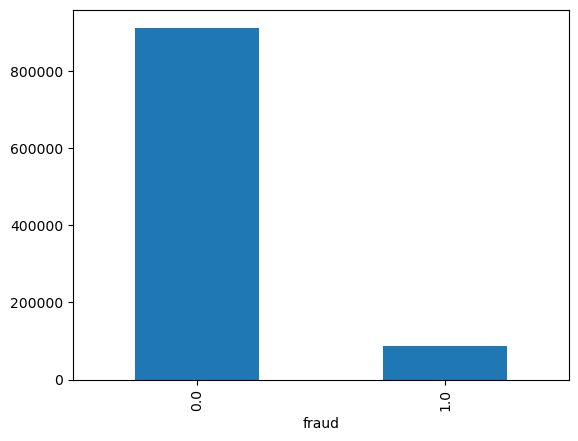

In [31]:
df_fraud = fraud["fraud"].value_counts()
df_fraud.plot(kind="bar")
plt.show()

- **2.** Train a LogisticRegression.

In [33]:
features = fraud.drop(columns = ["fraud"])
target = fraud["fraud"]

In [34]:
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state=0)

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled_np = scaler.transform(X_train)
X_test_scaled_np = scaler.transform(X_test)

log_reg = LogisticRegression()

X_train_scaled_df = pd.DataFrame(X_train_scaled_np, columns=X_train.columns, index=X_train.index)
X_test_scaled_df  = pd.DataFrame(X_test_scaled_np, columns=X_test.columns, index=X_test.index)

log_reg.fit(X_train_scaled_df, y_train)

log_reg.score(X_test_scaled_df, y_test)

y_pred_test_log = log_reg.predict(X_test_scaled_df)
print(classification_report(y_pred = y_pred_test_log, y_true = y_test))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.98    228273
         1.0       0.89      0.60      0.72     21727

    accuracy                           0.96    250000
   macro avg       0.93      0.80      0.85    250000
weighted avg       0.96      0.96      0.96    250000



**3.** Evaluate your model. Take in consideration class importance, and evaluate it by selection the correct metric.

In [35]:
log_reg_balanced = LogisticRegression(class_weight='balanced')
log_reg_balanced.fit(X_train_scaled_df, y_train)

LogisticRegression(class_weight='balanced')

In [36]:
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test, y_pred_test_log)
recall = recall_score(y_test, y_pred_test_log)
f1 = f1_score(y_test, y_pred_test_log)

print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Precision: 0.8904761904761904
Recall: 0.6024761817093939
F1 Score: 0.7186976693112251
